# Задание 1

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на
точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора. 

Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.

### Крестики-нолики

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
data = pd.read_csv('lab1_files/tic_tac_toe.csv')
data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'result']
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,result
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [131]:
encoded_data = data.apply(LabelEncoder().fit_transform)

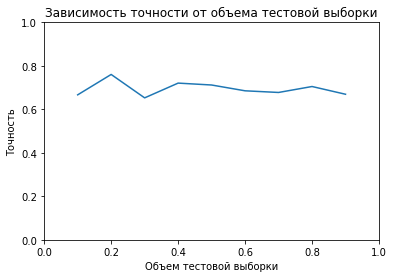

In [174]:
test_size = [i / 10 for i in range(1, 10)]
accuracy = []


for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        encoded_data.drop(['result'], axis=1), 
        encoded_data['result'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy)
plt.show()

### Спам e-mail сообщений

In [137]:
data_email = pd.read_csv('lab1_files/spam.csv')
data_email.type = data_email.type.map({'spam': 1, 'nonspam': 0})
data_email

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,4597,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,4599,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,4600,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


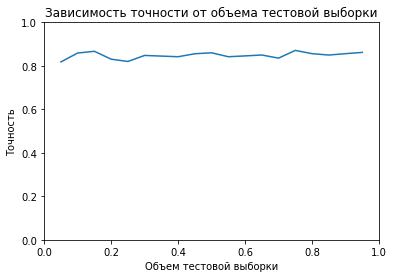

In [172]:
test_size = [i / 20 for i in range(1, 20)]
accuracy = []


for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        data_email.drop(['type'], axis=1), 
        data_email['type'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy)
plt.show()

# Задание 2

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2, среднеквадратические отклонения для обеих переменных, соответствующие вашему варианту (указан в таблице). 

Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые). 

Является ли построенный классификатор «хорошим»?